In [40]:
import numpy as np
from math import e, pow, log2
import sys
import seaborn as sns

In [27]:
def parse_libsvm_file(filename):
    labels = []
    features = []

    with open(filename, 'r') as file:
        for line in file:
            elements = line.strip().split(' ')
            labels.append(int(elements[0]))
            feature_vector = {}
            for item in elements[1:]:
                index, value = item.split(':')
                feature_vector[int(index)] = float(value)
            features.append(feature_vector)

    return labels, features

In [28]:
def load(train_file, test_file):
    labels_train, features_train = parse_libsvm_file(train_file)
    labels_test, features_test = parse_libsvm_file(test_file)

    num_samples = len(labels_train)
    num_features =  max(max(max(sample.keys()) for sample in features_train), max(max(test.keys()) for test in features_test))

     #weights = [w0 w1......wn] where n = num_features
    w = np.zeros(num_features+1)


    #first create a matrix with just features
    X_train = np.zeros((num_samples, num_features))
    for i, sample in enumerate(features_train):
        for j, value in sample.items():
            X_train[i, j-1] = value
    
    #join this matrix with a column of just ones for bias
    X_train = np.c_[np.ones(num_samples), X_train]


    #repeat for X_test
    X_test = np.zeros((len(labels_test), num_features))
    for i, sample in enumerate(features_test):
        for j, value in sample.items():
            X_test[i, j-1] = value
    
    #join this matrix with a column of just ones for bias
    X_test = np.c_[np.ones(len(labels_test)), X_test]

    y_train = np.array(labels_train)
    y_test = np.array(labels_test)

    return X_train, y_train, X_test, y_test, w

In [29]:
#dot product of two vectors a and b, a dot b
def dot_product(a, b):
    res = 0
    for i in range(len(a)):
        res+= a[i]*b[i]
    return res

In [30]:
def sigmoid(z):
    return 1/(1+pow(e, -z))

In [31]:
#define probability over vector x[i] and true val y[i] where i is one sample
def prob(w, x_n, y_n):
    return sigmoid(y_n*dot_product(w, x_n))


In [32]:
#gradient of loss with respect to weights, for some ith sample
def delta_loss(w, x_n, y_n):
    return (1-prob(w, x_n, y_n))*y_n*x_n

In [33]:
#cross entropy loss
def xent(X, y, w):
    xent = 0
    for i in range(len(y)):
        #xent += y[i]*log10(y_prob[i])
        xent -= log2(prob(w, X[i], y[i]))
    return (xent/len(y))

In [34]:
def get_accuracy_and_xent(X, y, w):
    sample_size = len(y)
    y_prob = (np.array([sigmoid(dot_product(w,X[j])) for j in range(sample_size)]))
    labelizer = (lambda t: 1 if t>0.5 else -1)
    labelizer = np.vectorize(labelizer)

    #get predicted labels
    y_pred = labelizer(y_prob)

    #calculate accuracy
    correct = 0
    total = 0
    for i, j in zip(y, y_pred):
        if i==j:
            correct+=1
        total +=1
    
    accuracy = float(correct/total)

    #calculate cross entropy loss
    xent_val = xent(X,y,w)

    return accuracy, xent_val

In [35]:
def train_one_pass(X_train, y_train, X_test, y_test, w,learning_rate):
    sample_size = len(y_train)
    
    for i in range(sample_size):
        w += learning_rate*delta_loss(w, X_train[i], y_train[i])



    
    #after weight updated, calculate the probability or sigmoid value
    #first 
    train_accuracy, train_xent = get_accuracy_and_xent(X_train, y_train, w)
    test_accuracy, test_xent = get_accuracy_and_xent(X_test, y_test, w)

   # print(f"TRAIN accuracy {train_accuracy:.3f} xent {train_xent:.3f}   TEST accuracy {test_accuracy:.3f} xent {test_xent:.3f}")

    return w, test_accuracy

In [56]:
def main(iter, lr):
    iteration_no =[]
    accs = []
    iterations = iter
    learning_rate = lr
    train_file = "a7a.train"
    test_file = "a7a.test"

    X_train, y_train, X_test, y_test, w = load(train_file, test_file)

    for iter in range(iterations):
        w, acc = train_one_pass(X_train, y_train, X_test, y_test, w,learning_rate)
        iteration_no.append(iter+1)
        accs.append(acc)


    return iteration_no, accs
    

In [79]:
x, y = main(100, 0.1)

Text(0, 0.5, 'Accuracy')

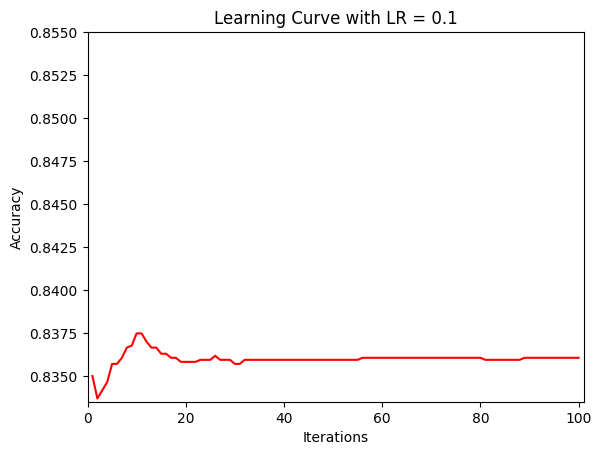

In [80]:
plot = sns.lineplot(x=x, y=y, color="red")
plot.set_xbound(lower=0, upper=101)
plot.set_ybound(upper=0.855)
plot.set_title("Learning Curve with LR = 0.1")
plot.set_xlabel("Iterations")
plot.set_ylabel("Accuracy")


Text(0, 0.5, 'Accuracy')

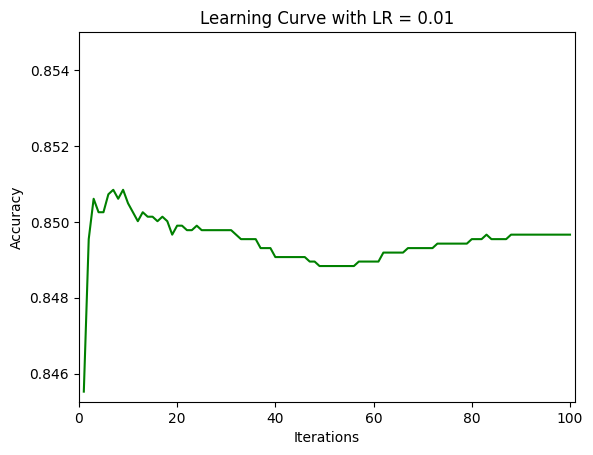

In [81]:
x, y = main(100, 0.01)
plot = sns.lineplot(x=x, y=y, color="green")
plot.set_xbound(lower=0, upper=101)
plot.set_ybound(upper=0.855)
plot.set_title("Learning Curve with LR = 0.01")
plot.set_xlabel("Iterations")
plot.set_ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

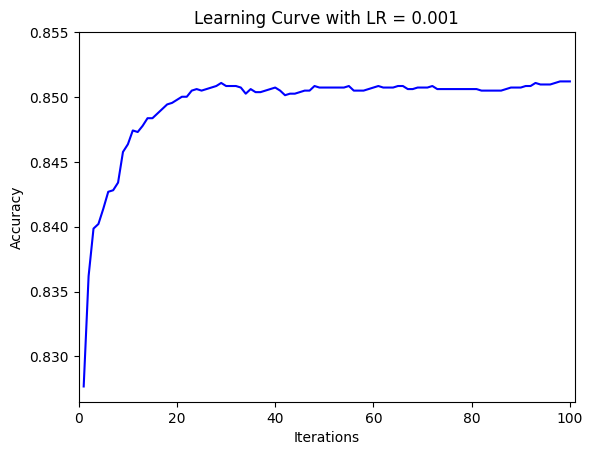

In [82]:
x, y = main(100, 0.001)
plot = sns.lineplot(x=x, y=y, color="blue")
plot.set_xbound(lower=0, upper=101)
plot.set_ybound(upper=0.855)
plot.set_title("Learning Curve with LR = 0.001")
plot.set_xlabel("Iterations")
plot.set_ylabel("Accuracy")